In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir('Datasets')

In [3]:
#to get rid of scientific notation above
pd.set_option('display.float_format', lambda x: '%.3f' % x) #converts to 3 decimal places
#to display all the columns, and not have ... in output
pd.set_option('display.max_columns',500) #to display a max of 500 columns

In [4]:
data_v1 = pd.read_csv('churn.csv')

In [5]:
data_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 22 columns):
Unnamed: 0          257 non-null int64
customerID          257 non-null object
tenure              257 non-null object
Contract            257 non-null object
PaperlessBilling    257 non-null object
PaymentMethod       257 non-null object
MonthlyCharges      247 non-null float64
TotalCharges        242 non-null float64
gender              257 non-null object
SeniorCitizen       252 non-null float64
Partner             257 non-null object
Dependents          257 non-null object
PhoneService        257 non-null object
MultipleLines       257 non-null object
InternetService     257 non-null object
OnlineSecurity      257 non-null object
OnlineBackup        257 non-null object
DeviceProtection    257 non-null object
TechSupport         257 non-null object
StreamingTV         257 non-null object
StreamingMovies     257 non-null object
Churn               257 non-null object
dtypes: float

In [6]:
data_v1 = data_v1.drop(labels = ['Unnamed: 0'], axis = 1)

In [7]:
data = data_v1.copy(deep = True)

In [8]:
data_v1['NAPresent'] = data_v1.isnull().sum(axis = 1)  #adding a column to represent NA values
data_v1['NAPresent'].value_counts()

0    227
1     30
Name: NAPresent, dtype: int64

In [11]:
cust_unique_demo = len(np.unique(data['customerID']))
print(len(data.customerID) - cust_unique_demo)

7


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 21 columns):
customerID          257 non-null object
tenure              257 non-null object
Contract            257 non-null object
PaperlessBilling    257 non-null object
PaymentMethod       257 non-null object
MonthlyCharges      247 non-null float64
TotalCharges        242 non-null float64
gender              257 non-null object
SeniorCitizen       252 non-null float64
Partner             257 non-null object
Dependents          257 non-null object
PhoneService        257 non-null object
MultipleLines       257 non-null object
InternetService     257 non-null object
OnlineSecurity      257 non-null object
OnlineBackup        257 non-null object
DeviceProtection    257 non-null object
TechSupport         257 non-null object
StreamingTV         257 non-null object
StreamingMovies     257 non-null object
Churn               257 non-null object
dtypes: float64(3), object(18)
memory usage: 42.3+ K

In [22]:
data.describe()

,MonthlyCharges,TotalCharges,SeniorCitizen
count,247.000,242.000,252.000
mean,62.473,2267.954,0.135
std,31.127,2270.877,0.342
min,3.500,18.850,0.000
25%,25.700,450.687,0.000
50%,70.300,1313.025,0.000
75%,88.325,3691.188,0.000
max,115.100,8337.450,1.000


In [20]:
data.head()

,customerID,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,8260-NGFNY,One,Month-to-month,No,Mailed check,25.200,25.200,Female,0.000,No,No,No,No phone service,DSL,No,No,No,No,No,No,Yes
1,2359-QWQUL,39,One year,Yes,Credit card (automatic),104.700,4134.850,Female,0.000,Yes,No,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Yes
2,6598/RFFVI,2,One year,No,Credit card (automatic),19.300,28.300,Male,0.000,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes
3,IXSTS-8780,6,Month-to-month,Yes,Electronic check,90.100,521.300,Female,0.000,No,No,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Yes
4,2674/MIAHT,Four,Month-to-month,Yes,Mailed check,80.300,324.200,Female,0.000,No,No,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,No


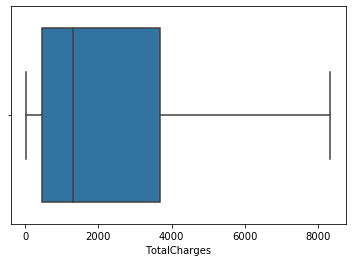

In [23]:
sns.boxplot(data['TotalCharges'])

In [27]:
data.tenure.value_counts()
data.tenure = data.tenure.replace("One", 1)
data.tenure = data.tenure.replace("Four", 4)

In [28]:
data.tenure.value_counts()

1       20
72      15
44      11
4        9
2        9
        ..
17       1
994      1
41       1
1008     1
969      1
Name: tenure, Length: 71, dtype: int64

In [29]:
data.tenure = data.tenure.astype(int)

In [33]:
print(data.SeniorCitizen.isnull().value_counts())

False    252
True       5
Name: SeniorCitizen, dtype: int64


In [34]:
print(data.SeniorCitizen.value_counts())

0.000    218
1.000     34
Name: SeniorCitizen, dtype: int64


In [35]:
print(data.Dependents.value_counts())

No     171
Yes     80
1@#      6
Name: Dependents, dtype: int64


In [10]:
print(data.TotalCharges.isnull().value_counts())

False    242
True      15
Name: TotalCharges, dtype: int64
